## Lab07

In [ ]:
%pip install --user autogluon

In [1]:
import pandas as pd
# Importing pandas profiling
from  ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import autogluon

#### Load the data

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

#### EDA

In [5]:
# Get basic descriptive statistics
descriptive_stats = diabetes_df.describe()
descriptive_stats

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Valores nulos

In [6]:
null_values = diabetes_df.isnull().sum()
null_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

El dataset no contiene valores nulos

Pandas Profiler

In [7]:
# Generating a profile report for the insurance dataset
profile = ProfileReport(diabetes_df, title="Diabetes Data Profiling Report", explorative=True)

# Export the report to an HTML file
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Para visualizar el reporte generado, abra "insurance_data_profile_report.html"

<Axes: >

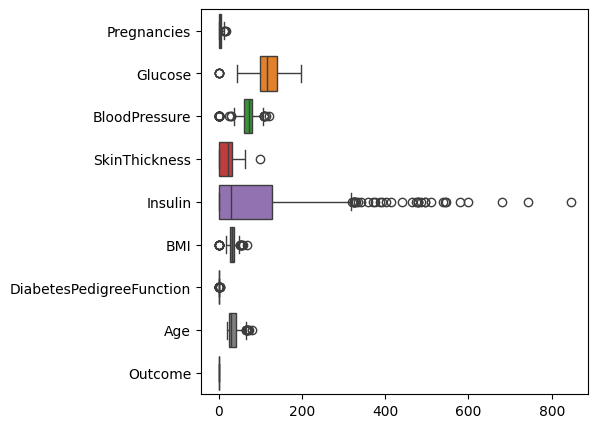

In [21]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Verify outliers
plt.figure(figsize=(5, 5))
sns.boxplot(data=diabetes_df, orient='h')

Existen valores atipicos en bmi y charges

In [24]:
# Calculate IQR for the numerical columns

Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
outliers = diabetes_df[((diabetes_df < (Q1 - 1.5 * IQR)) | 
                         (diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)]

outliers

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7                       0.134   29        0  
8                       0.158   53        1  
9                       0.232   54        1  
12                      1.441   57        0  
..                        ...  ...      ...  
706                     0.261   30        1  
707                     0.176   22        0  
710                     0.295   24        0  
715                     0.826   34        1  
753                     0.222   26        1  

[129 rows x 9 columns]

In [25]:
len(outliers)/len(diabetes_df) * 100

16.796875

Los outliers representan el 17% de todo el conjunto de datos. Por lo tanto no es viable eliminarlos.

#### Cap or Floor Outliers (Winsorization)

In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
diabetes_df = diabetes_df.clip(lower=lower_bound, upper=upper_bound, axis=1)


Reemplazo de los valores extremos con los valores límite más cercanos.
Este puede ser un enfoque intermedio en el que aún se tienen en cuenta los valores atípicos, pero se reduce su impacto.

#### Autogluon

El conjunto representa los datos de personas que utilizan cierta aseguradora. Por lo tanto, se plantea un problema de regresión respecto a los cargos que pueda tener una persona según sus características.

In [31]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import confusion_matrix

# Verify the columns in the dataframe
print(diabetes_df.columns)

# Assuming 'Outcome' is the target variable, update the label accordingly
predictor = TabularPredictor(label='Outcome', eval_metric='accuracy').fit(
    train_data=diabetes_df, 
    presets='best_quality'
)

# View leaderboard of models
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard)

# Display a fit summary
predictor.fit_summary()

# Make predictions on the training dataset (diabetes_df)
predictions = predictor.predict(diabetes_df)

# Generate the confusion matrix using true labels and predicted labels
cm = confusion_matrix(diabetes_df['Outcome'], predictions)

# Print the confusion matrix
print("Confusion Matrix (Training Data):")
print(cm)

No path specified. Models will be saved in: "AutogluonModels\ag-20241001_220812"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
Memory Avail:       2.83 GB / 15.73 GB (18.0%)
Disk Space Avail:   4.69 GB / 120.00 GB (3.9%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Leaderboard on holdout data (DyStack):
                          model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               LightGBM_BAG_L1       0.790698   0.800587    accuracy        0.608335       0.008190    1.131055                 0.608335                0.008190           1.131055            1       True          4
1            XGBoost_r33_BAG_L1       0.779070   0.781525    accuracy        0.701638       0.028018    1.985835                 0.701638                0.028018           1.985835            1       True         21
2       RandomForestEntr_BAG_L1       0.767442   0.750733    accuracy        0.339723       0.187512    1.176557                 0.339723                0.187512           1.176557            1       True          6
3                XGBoost_BAG_L1       0.767442   0.793255    accuracy        0.635254       0.024

                      model  score_val eval_metric  pred_time_val  \
0       WeightedEnsemble_L3   0.839844    accuracy      22.270578   
1           CatBoost_BAG_L2   0.835938    accuracy      22.254430   
2         LightGBMXT_BAG_L2   0.833333    accuracy      22.057856   
3      CatBoost_r177_BAG_L2   0.833333    accuracy      22.193831   
4           LightGBM_BAG_L2   0.832031    accuracy      22.046225   
..                      ...        ...         ...            ...   
82  RandomForest_r34_BAG_L1   0.757812    accuracy       0.305367   
83  RandomForest_r39_BAG_L1   0.755208    accuracy       0.729444   
84    ExtraTrees_r42_BAG_L1   0.751302    accuracy       0.071381   
85    KNeighborsUnif_BAG_L1   0.722656    accuracy       0.443629   
86    KNeighborsDist_BAG_L1   0.722656    accuracy       0.453778   

       fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0   1772.433293                0.000000           0.514110            3   
1   1765.509034      

C:\Users\bcarr\AppData\Roaming\Python\Python39\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


Confusion Matrix (Training Data):
[[434  66]
 [101 167]]


2024-10-01 17:15:00,908	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-10-01 17:15:00,915	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


Según la tabla desplegada, el mejor modelo es el obtenido con el algoritmo WeightedEnsemble_L3, con un accuracy de 0.839844

#### Reflexión

Las herramientas de AutoML, como AutoGluon, facilitan el aprendizaje automático al automatizar procesos complejos, haciéndolo accesible para no expertos, pero también presentan limitaciones. A continuación, se resumen sus principales ventajas y desventajas:

#### Ventajas:
- Accesibilidad: Permiten a personas sin experiencia crear modelos de aprendizaje automático efectivos.
- Velocidad: Pueden probar múltiples modelos y configuraciones rápidamente, ahorrando tiempo.
- Ingeniería de características automatizada: Identifican características clave y generan nuevas automáticamente.
- Selección de modelos: Prueban varios tipos de modelos y eligen el mejor basado en los datos.
- Ahorro de tiempo: Automatizan entrenamiento y ajuste de modelos, reduciendo el esfuerzo manual.
- Rendimiento: Pueden igualar o superar modelos creados manualmente por no expertos.

#### Desventajas:
- Personalización limitada: Restricciones en ajustes y control sobre los modelos generados.
- Modelos de caja negra: Difícil interpretar cómo los modelos toman decisiones.
- Compensaciones en rendimiento: No siempre garantizan el mejor resultado posible.
- Uso intensivo de recursos: Requieren mucho poder computacional y tiempo.
- Sobreajuste: Pueden sobreajustar los datos sin una validación adecuada.
- Limitaciones en ingeniería de características: No superan la experiencia de dominio en ciertos casos.

En resumen, AutoML es útil para acelerar el desarrollo de modelos, especialmente para usuarios no expertos, pero puede presentar limitaciones en términos de personalización, interpretación y rendimiento en situaciones específicas.